In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import os
pd.options.display.float_format = '{:.2f}'.format

# Data Clean

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

files = os.listdir(path)
print("Available files:", files)
df_train = pd.read_csv(f'{path}/train.csv')
df_test = pd.read_csv(f'{path}/test.csv')
df_train.head()

Available files: ['test.csv', 'train.csv']


/var/folders/h3/k12jkzgd33q8wkd3qpryvhsh0000gn/T/ipykernel_57151/2178756824.py:8: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(f'{path}/train.csv')


ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12                1824.84                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12                1824.84                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                  4.00   
1                    NaN                11.27                  4.00   
2                      7                    _                  4.00   
3                      4                 6.27                  4.00   
4                    NaN                11.27                  4.00   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                     26.82   
1       Good           809.98                     31.94   
2       Good           809.98                     28.61   
3       Good           809.98                     31.38   
4       Good           809.98                     24.80   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No                49.57   
1                    NaN                    No                49.57   
2  22 Years and 3 Months                    No                49.57   
3  22 Years and 4 Months                    No                49.57   
4  22 Years and 5 Months                    No                49.57   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

In [3]:
df_copy = df_train.copy()
df_copy.dropna(inplace=True)
df_copy.shape

(53049, 28)

In [4]:
df_train.shape

(100000, 28)

In [5]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(150000, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [7]:
df.describe().T

count    mean     std    min     25%     50%  \
Monthly_Inhand_Salary    127500.00 4190.12 3180.49 303.65 1625.27 3091.00   
Num_Bank_Accounts        150000.00   17.01  117.07  -1.00    3.00    6.00   
Num_Credit_Card          150000.00   22.62  129.14   0.00    4.00    5.00   
Interest_Rate            150000.00   71.23  461.54   1.00    8.00   13.00   
Delay_from_due_date      150000.00   21.06   14.86  -5.00   10.00   18.00   
Num_Credit_Inquiries     147000.00   28.53  194.46   0.00    3.00    6.00   
Credit_Utilization_Ratio 150000.00   32.28    5.11  20.00   28.05   32.30   
Total_EMI_per_month      150000.00 1432.51 8403.76   0.00   30.95   71.28   

                             75%      max  
Monthly_Inhand_Salary    5948.45 15204.63  
Num_Bank_Accounts           7.00  1798.00  
Num_Credit_Card             7.00  1499.00  
Interest_Rate              20.00  5799.00  
Delay_from_due_date        28.00    67.00  
Num_Credit_Inquiries        9.00  2597.00  
Credit_Utilization_Ratio   36.49    50.00  
Total_EMI_per_month       166.28 82398.00

In [8]:
df.describe(exclude=np.number).T

count  unique                               top  \
ID                       150000  150000                           0x25fc1   
Customer_ID              150000   12500                        CUS_0x942c   
Month                    150000      12                           January   
Name                     135000   10139                            Stevex   
Age                      150000    2524                                39   
SSN                      150000   12501                         #F%$D@*&8   
Occupation               150000      16                           _______   
Annual_Income            150000   21192                          36585.12   
Num_of_Loan              150000     623                                 3   
Type_of_Loan             132888    6260                     Not Specified   
Num_of_Delayed_Payment   139500    1058                                19   
Changed_Credit_Limit     150000    4605                                 _   
Credit_Mix               150000       4                          Standard   
Outstanding_Debt         150000   13622                           1360.45   
Credit_History_Age       136500     408            17 Years and 11 Months   
Payment_of_Min_Amount    150000       3                               Yes   
Amount_invested_monthly  143250  136497                         __10000__   
Payment_Behaviour        150000       7    Low_spent_Small_value_payments   
Monthly_Balance          148238  148224  __-333333333333333333333333333__   
Credit_Score             100000       3                          Standard   

                          freq  
ID                           1  
Customer_ID                 12  
Month                    12500  
Name                        66  
Age                       4198  
SSN                       8400  
Occupation               10500  
Annual_Income               24  
Num_of_Loan              21500  
Type_of_Loan              2112  
Num_of_Delayed_Payment    7949  
Changed_Credit_Limit      3150  
Credit_Mix               54858  
Outstanding_Debt            36  
Credit_History_Age         628  
Payment_of_Min_Amount    78484  
Amount_invested_monthly   6480  
Payment_Behaviour        38207  
Monthly_Balance             15  
Credit_Score             53174

In [9]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [10]:
# Analyze one customer data to assess the problem with the data
df[df['Customer_ID'] == 'CUS_0xd40']

ID Customer_ID      Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40    January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40   February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40      March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40      April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40        May  Aaron Maashoh    23  821-00-0265   
5       0x1607   CUS_0xd40       June  Aaron Maashoh    23  821-00-0265   
6       0x1608   CUS_0xd40       July  Aaron Maashoh    23  821-00-0265   
7       0x1609   CUS_0xd40     August            NaN    23    #F%$D@*&8   
100000  0x160a   CUS_0xd40  September  Aaron Maashoh    23  821-00-0265   
100001  0x160b   CUS_0xd40    October  Aaron Maashoh    24  821-00-0265   
100002  0x160c   CUS_0xd40   November  Aaron Maashoh    24  821-00-0265   
100003  0x160d   CUS_0xd40   December  Aaron Maashoh   24_  821-00-0265   

       Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       Scientist      19114.12                1824.84                  3   
1       Scientist      19114.12                    NaN                  3   
2       Scientist      19114.12                    NaN                  3   
3       Scientist      19114.12                    NaN                  3   
4       Scientist      19114.12                1824.84                  3   
5       Scientist      19114.12                    NaN                  3   
6       Scientist      19114.12                1824.84                  3   
7       Scientist      19114.12                1824.84                  3   
100000  Scientist      19114.12                1824.84                  3   
100001  Scientist      19114.12                1824.84                  3   
100002  Scientist      19114.12                1824.84                  3   
100003  Scientist      19114.12                    NaN                  3   

        Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                     4              3           4   
1                     4              3           4   
2                     4              3           4   
3                     4              3           4   
4                     4              3           4   
5                     4              3           4   
6                     4              3           4   
7                     4              3           4   
100000                4              3           4   
100001                4              3           4   
100002                4              3           4   
100003                4              3           4   

                                             Type_of_Loan  \
0       Auto Loan, Credit-Builder Loan, Personal Loan,...   
1       Auto Loan, Credit-Builder Loan, Personal Loan,...   
2       Auto Loan, Credit-Builder Loan, Personal Loan,...   
3       Auto Loan, Credit-Builder Loan, Personal Loan,...   
4       Auto Loan, Credit-Builder Loan, Personal Loan,...   
5       Auto Loan, Credit-Builder Loan, Personal Loan,...   
6       Auto Loan, Credit-Builder Loan, Personal Loan,...   
7       Auto Loan, Credit-Builder Loan, Personal Loan,...   
100000  Auto Loan, Credit-Builder Loan, Personal Loan,...   
100001  Auto Loan, Credit-Builder Loan, Personal Loan,...   
100002  Auto Loan, Credit-Builder Loan, Personal Loan,...   
100003  Auto Loan, Credit-Builder Loan, Personal Loan,...   

        Delay_from_due_date Num_of_Delayed_Payment Changed_Credit_Limit  \
0                         3                      7                11.27   
1                        -1                    NaN                11.27   
2                         3                      7                    _   
3                         5                      4                 6.27   
4                         6                    NaN                11.27   
5                         8                      4                 9.27   
6           

# Overview of the data
- Incorrect data types
- Many null values
- Many outliers
- Some data needs to be cleaned($number _)
- There are some irregular numbers but can be retrived from other rows.

## Clean Object values

In [11]:
#Objects that suppose to be int or float contains _. So clean them
def text_cleaning(data):
    if data is np.nan or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [12]:
df = df.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.nan)

/var/folders/h3/k12jkzgd33q8wkd3qpryvhsh0000gn/T/ipykernel_45506/3761606409.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.nan)


In [13]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

## Fix Data types

In [14]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       150000 non-null  object
 1   Customer_ID              150000 non-null  object
 2   Month                    150000 non-null  object
 3   Name                     135000 non-null  object
 4   Age                      150000 non-null  object
 5   SSN                      141600 non-null  object
 6   Occupation               139500 non-null  object
 7   Annual_Income            150000 non-null  object
 8   Num_of_Loan              150000 non-null  object
 9   Type_of_Loan             132888 non-null  object
 10  Num_of_Delayed_Payment   139500 non-null  object
 11  Changed_Credit_Limit     146850 non-null  object
 12  Credit_Mix               120000 non-null  object
 13  Outstanding_Debt         150000 non-null  object
 14  Credit_History_Age  

In [15]:
#Social Security Number and Name are unnecessary
#Leave Customer_ID since we will fill missing values using Customer_ID and ID just in case
df.drop(['SSN','Name'], axis=1, inplace=True)

In [16]:
df['ID']                      = df.ID.apply(lambda x: int(x, 16))
df['Customer_ID']             = df.Customer_ID.apply(lambda x: int(x[4:], 16))
df['Month']                   = pd.to_datetime(df.Month, format='%B').dt.month
df['Age']                     = df.Age.astype(int)
df['Annual_Income']           = df.Annual_Income.astype(float)
df['Num_of_Loan']             = df.Num_of_Loan.astype(int)
df['Num_of_Delayed_Payment']  = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit']    = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt']        = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance']         = df.Monthly_Balance.astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int32  
 3   Age                       150000 non-null  int64  
 4   Occupation                139500 non-null  object 
 5   Annual_Income             150000 non-null  float64
 6   Monthly_Inhand_Salary     127500 non-null  float64
 7   Num_Bank_Accounts         150000 non-null  int64  
 8   Num_Credit_Card           150000 non-null  int64  
 9   Interest_Rate             150000 non-null  int64  
 10  Num_of_Loan               150000 non-null  int64  
 11  Type_of_Loan              132888 non-null  object 
 12  Delay_from_due_date       150000 non-null  int64  
 13  Num_of_Delayed_Payment    139500 non-null  f

In [18]:
#Convert credit history age into a number
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])

        return (num1*12)+num2
    else:
        return x

In [19]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [20]:
df.head()

ID  Customer_ID  Month  Age Occupation  Annual_Income  \
0  5634         3392      1   23  Scientist       19114.12   
1  5635         3392      2   23  Scientist       19114.12   
2  5636         3392      3 -500  Scientist       19114.12   
3  5637         3392      4   23  Scientist       19114.12   
4  5638         3392      5   23  Scientist       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0                1824.84                  3                4              3   
1                    NaN                  3                4              3   
2                    NaN                  3                4              3   
3                    NaN                  3                4              3   
4                1824.84                  3                4              3   

   Num_of_Loan                                       Type_of_Loan  \
0            4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
1            4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
2            4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
3            4  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4            4  Auto Loan, Credit-Builder Loan, Personal Loan,...   

   Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0                    3                    7.00                 11.27   
1                   -1                     NaN                 11.27   
2                    3                    7.00                   NaN   
3                    5                    4.00                  6.27   
4                    6                     NaN                 11.27   

   Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
0                  4.00        NaN            809.98   
1                  4.00       Good            809.98   
2                  4.00       Good            809.98   
3                  4.00       Good            809.98   
4                  4.00       Good            809.98   

   Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
0                     26.82              265.00                    No   
1                     31.94                 NaN                    No   
2                     28.61              267.00                    No   
3                     31.38              268.00                    No   
4                     24.80              269.00                    No   

   Total_EMI_per_month  Amount_invested_monthly  \
0                49.57                    80.42   
1                49.57                   118.28   
2                49.57                    81.70   
3                49.57                   199.46   
4                49.57                    41.42   

                  Payment_Behaviour  Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments           312.49         Good  
1    Low_spent_Large_value_payments           284.63         Good  
2   Low_spent_Medium_value_payments           331.21         Good  
3    Low_spent_Small_value_payments           223.45         Good  
4  High_spent_Medium_value_payments           341.49         Good

### Types of loan
one column contains multiple categirues.
- clean text
- convert into numbers

In [21]:
df['Type_of_Loan'].value_counts(dropna=False).head(20)

Type_of_Loan
NaN                                         17112
Not Specified                                2112
Credit-Builder Loan                          1920
Personal Loan                                1908
Debt Consolidation Loan                      1896
Student Loan                                 1860
Payday Loan                                  1800
Mortgage Loan                                1764
Auto Loan                                    1728
Home Equity Loan                             1704
Personal Loan, and Student Loan               480
Not Specified, and Payday Loan                408
Mortgage Loan, and Home Equity Loan           396
Student Loan, and Payday Loan                 384
Student Loan, and Credit-Builder Loan         372
Credit-Builder Loan, and Not Specified        372
Payday Loan, and Debt Consolidation Loan      360
Payday Loan, and Auto Loan                    360
Auto Loan, and Personal Loan                  348
Credit-Builder Loan, and Mortgage Loa

In [22]:
#clean data
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

In [23]:
df.head()

ID  Customer_ID  Month  Age Occupation  Annual_Income  \
0  5634         3392      1   23  Scientist       19114.12   
1  5635         3392      2   23  Scientist       19114.12   
2  5636         3392      3 -500  Scientist       19114.12   
3  5637         3392      4   23  Scientist       19114.12   
4  5638         3392      5   23  Scientist       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0                1824.84                  3                4              3   
1                    NaN                  3                4              3   
2                    NaN                  3                4              3   
3                    NaN                  3                4              3   
4                1824.84                  3                4              3   

   Num_of_Loan                                       Type_of_Loan  \
0            4  auto loan,credit-builder loan,personal loan,ho...   
1            4  auto loan,credit-builder loan,personal loan,ho...   
2            4  auto loan,credit-builder loan,personal loan,ho...   
3            4  auto loan,credit-builder loan,personal loan,ho...   
4            4  auto loan,credit-builder loan,personal loan,ho...   

   Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0                    3                    7.00                 11.27   
1                   -1                     NaN                 11.27   
2                    3                    7.00                   NaN   
3                    5                    4.00                  6.27   
4                    6                     NaN                 11.27   

   Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
0                  4.00        NaN            809.98   
1                  4.00       Good            809.98   
2                  4.00       Good            809.98   
3                  4.00       Good            809.98   
4                  4.00       Good            809.98   

   Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
0                     26.82              265.00                    No   
1                     31.94                 NaN                    No   
2                     28.61              267.00                    No   
3                     31.38              268.00                    No   
4                     24.80              269.00                    No   

   Total_EMI_per_month  Amount_invested_monthly  \
0                49.57                    80.42   
1                49.57                   118.28   
2                49.57                    81.70   
3                49.57                   199.46   
4                49.57                    41.42   

                  Payment_Behaviour  Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments           312.49         Good  
1    Low_spent_Large_value_payments           284.63         Good  
2   Low_spent_Medium_value_payments           331.21         Good  
3    Low_spent_Small_value_payments           223.45         Good  
4  High_spent_Medium_value_payments           341.49         Good

In [24]:
df['Type_of_Loan'].value_counts(dropna=False).head(20)

Type_of_Loan
NaN                                    17112
not specified                           2112
credit-builder loan                     1920
personal loan                           1908
debt consolidation loan                 1896
student loan                            1860
payday loan                             1800
mortgage loan                           1764
auto loan                               1728
home equity loan                        1704
personal loan,student loan               480
not specified,payday loan                408
mortgage loan,home equity loan           396
student loan,payday loan                 384
student loan,credit-builder loan         372
credit-builder loan,not specified        372
payday loan,debt consolidation loan      360
payday loan,auto loan                    360
auto loan,personal loan                  348
credit-builder loan,mortgage loan        348
Name: count, dtype: int64

In [25]:
def get_Values_Colum(df_column, diff_value=[], sep=',', replace=''):
    column = df_column.dropna()
    for i in column:
        if sep not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), re.sub(replace, '', i).split(sep)):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [26]:
get_Values_Colum(df['Type_of_Loan'])


{0: 'auto loan',
 1: 'credit-builder loan',
 2: 'debt consolidation loan',
 3: 'home equity loan',
 4: 'mortgage loan',
 5: 'not specified',
 6: 'payday loan',
 7: 'personal loan',
 8: 'student loan'}

## auto fill missing data
Some data is missing but it is found on different row where customer ID = customer ID

In [27]:
def Object_NaN_Values_Reassign_Group_Mode(df, groupby, column, inplace=True):
    # Assigning Wrong values Make Simple Function
  def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
      # Assign None to np.NaN
      df[column] = df[column].replace({None: np.nan})

      # Fill with local mode using Pandas
      def group_mode(series):
          return series.mode().iloc[0] if not series.mode().empty else np.nan

      result = df.groupby(groupby)[column].transform(lambda x: x.fillna(group_mode(x)))

      if inplace:
          df[column] = result
      else:
          return result

  if inplace:
      # Before Assigning NaN values
      if df[column].value_counts(dropna=False).index.isna().sum():
          x = df[column].value_counts(dropna=False).loc[[np.nan]]
          print(f'\nBefore Assigning: {column}:', f'have {x.values[0]} NaN Values', end='\n')

      a = df.groupby(groupby)[column].apply(list)
      print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')

      # Assigning
      make_NaN_and_fill_mode(df, groupby, column, inplace)

      # After Assigning NaN values
      if df[column].value_counts(dropna=False).index.isna().sum():
          y = df[column].value_counts(dropna=False).loc[[np.nan]]
          print(f'\nBefore Assigning: {column}:', f'have {y.values[0]} NaN Values', end='\n')

      b = df.groupby(groupby)[column].apply(list)
      print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
  else:
      # Show
      return make_NaN_and_fill_mode(df, groupby, column, inplace)

In [28]:
Object_NaN_Values_Reassign_Group_Mode(df, 'Customer_ID', 'Occupation')


Before Assigning: Occupation: have 10500 NaN Values

Before Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', nan, 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Manager', 'Manager', nan, 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager']
['Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer']
['Accountant', nan, 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', nan, 'Accountant', 'Accountant']
['Writer', 'Writer', 'Writer', 'Writer', nan, 'Writer', 'Writer', 'Writer', nan, 'Writer', 'Writer', 'Writer']

After Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journali

In [29]:
Object_NaN_Values_Reassign_Group_Mode(df, 'Customer_ID', 'Credit_Mix')


Before Assigning: Credit_Mix: have 30000 NaN Values

Before Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Standard', 'Standard', 'Standard', nan, 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Standard', 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard']
[nan, nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']

After Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard

In [30]:
Object_NaN_Values_Reassign_Group_Mode(df, 'Customer_ID', 'Payment_Behaviour')


Before Assigning: Payment_Behaviour: have 11400 NaN Values

Before Assigning Example Payment_Behaviour:

['High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', nan, 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', nan, 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_

In [31]:
df['Type_of_Loan'].fillna('No Data', inplace=True)

/var/folders/h3/k12jkzgd33q8wkd3qpryvhsh0000gn/T/ipykernel_45506/1586668218.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type_of_Loan'].fillna('No Data', inplace=True)


In [32]:
loan_cat = ['auto loan', 'credit-builder loan','debt consolidation loan','home equity loan','mortgage loan','not specified','payday loan','personal loan','student loan','No Data']
for category in loan_cat:
    df[category] = df['Type_of_Loan'].apply(
        lambda x: 'yes' if isinstance(x, str) and category in x else 'no'
    )

In [33]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

### Eliminate outliers and fill nan values

In [34]:
df.isnull().sum().T

ID                              0
Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
auto loan                       0
credit-builder loan             0
debt consolidation loan         0
home equity lo

In [35]:
df.describe().T

count                        mean  \
ID                       150000.00                    80633.50   
Customer_ID              150000.00                    25982.67   
Month                    150000.00                        6.50   
Age                      150000.00                      110.34   
Annual_Income            150000.00                   173055.20   
Monthly_Inhand_Salary    127500.00                     4190.12   
Num_Bank_Accounts        150000.00                       17.01   
Num_Credit_Card          150000.00                       22.62   
Interest_Rate            150000.00                       71.23   
Num_of_Loan              150000.00                        3.14   
Delay_from_due_date      150000.00                       21.06   
Num_of_Delayed_Payment   139500.00                       30.91   
Changed_Credit_Limit     146850.00                       10.38   
Num_Credit_Inquiries     147000.00                       28.53   
Outstanding_Debt         150000.00                     1426.22   
Credit_Utilization_Ratio 150000.00                       32.28   
Credit_History_Age       136500.00                      223.22   
Total_EMI_per_month      150000.00                     1432.51   
Amount_invested_monthly  143250.00                      638.83   
Monthly_Balance          148238.00 -33729543032150998122496.00   

                                                  std  \
ID                                           43301.41   
Customer_ID                                  14340.52   
Month                                            3.45   
Age                                            684.07   
Annual_Income                              1404214.60   
Monthly_Inhand_Salary                         3180.49   
Num_Bank_Accounts                              117.07   
Num_Credit_Card                                129.14   
Interest_Rate                                  461.54   
Num_of_Loan                                     63.91   
Delay_from_due_date                             14.86   
Num_of_Delayed_Payment                         224.53   
Changed_Credit_Limit                             6.79   
Num_Credit_Inquiries                           194.46   
Outstanding_Debt                              1155.13   
Credit_Utilization_Ratio                         5.11   
Credit_History_Age                              99.72   
Total_EMI_per_month                           8403.76   
Amount_invested_monthly                       2046.84   
Monthly_Balance          3352926955206791212826624.00   

                                                     min      25%      50%  \
ID                                               5634.00 43133.75 80633.50   
Customer_ID                                      1006.00 13664.50 25777.00   
Month                                               1.00     3.75     6.50   
Age                                              -500.00    25.00    33.00   
Annual_Income                                    7005.93 19455.49 37578.61   
Monthly_Inhand_Salary                             303.65  1625.27  3091.00   
Num_Bank_Accounts                                  -1.00     3.00     6.00   
Num_Credit_Card                                     0.00     4.00     5.00   
Interest_Rate                                       1.00     8.00    13.00   
Num_of_Loan                                      -100.00     1.00     3.00   
Delay_from_due_date                                -5.00    10.00    18.00   
Num_of_Delayed_Payment                             -3.00     9.00    14.00   
Changed_Credit_Limit                               -6.49     5.33     9.41   
Num_Credit_Inquiries                                0.00     3.00     6.00   
Outstanding_Debt                                    0.23   566.07  1166.15   
Credit_Utilization_Ratio                           20.00    28.05    32.30   
Credit_History_Age                                  1.00   146.00   222.00   
Total_EMI_per_month                     

In [36]:
df.nlargest(10, 'Annual_Income')
#If Annual Income were right, we must be able to observe consecutive occurance of Customer_ID.

ID  Customer_ID  Month  Age    Occupation  Annual_Income  \
48302    78084         3324      7   31      Engineer    24198062.00   
7814     17352        45472      7   17        Lawyer    24188807.00   
59059    94221        23407      4   21      Mechanic    24177153.00   
14588    27514        27821      5   38       Teacher    24160009.00   
112010   41668         7421     11   37     Scientist    24137255.00   
146479  145073        39578     12   27      Mechanic    24121832.00   
102323   12605        44895     12   22     Scientist    24112304.00   
27262    46524         6691      7   51        Lawyer    24105369.00   
39829    65375        33175      6   31  Entrepreneur    24105151.00   
12307    24093         9616      4   19      Engineer    24096975.00   

        Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
48302                 1135.53                  4                5   
7814                  1067.66                  8                6   
59059                 2373.83                  4                3   
14588                 3852.98                 10                6   
112010                2756.17                  3                7   
146479                2102.12                  6                7   
102323                6966.97                  2                2   
27262                 3165.79                  3                7   
39829                 2338.10                  4                5   
12307                  912.60                  6                5   

        Interest_Rate  Num_of_Loan  \
48302               5            4   
7814               23            9   
59059               6            0   
14588              28            8   
112010              8            2   
146479             15            3   
102323              7            0   
27262               7            3   
39829              15            3   
12307              19            0   

                                             Type_of_Loan  \
48302   personal loan,auto loan,student loan,credit-bu...   
7814    student loan,home equity loan,student loan,not...   
59059                                             No Data   
14588   personal loan,mortgage loan,not specified,pers...   
112010               credit-builder loan,home equity loan   
146479  home equity loan,mortgage loan,debt consolidat...   
102323                                            No Data   
27262        personal loan,personal loan,home equity loan   
39829          home equity loan,payday loan,mortgage loan   
12307                                             No Data   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
48302                    15                   19.00                  9.03   
7814                     47                   23.00                 15.69   
59059                     6                    4.00                  2.56   
14588                    38                   25.00                 20.27   
112010                    5                   17.00                 15.80   
146479                   31                     NaN                  8.62   
102323                   14                   11.00                  5.60   
27262                     3                    9.00                  9.06   
39829                    10                   20.00                 17.61   
12307                     6                     NaN                 10.56   

        Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
48302                   7.00       Good            672.49   
7814                   12.00        Bad           3703.96   
59059                   3.00       Good           1443.42   
14588                   8.00        Bad           3148.34   
112010                  8.00   Standard           1197.22   
146479                  8.00   Standard           1065.82   
102323                  7.00       Good           1457.34   
27262                   4.00    

### example
Taking Customer_ID = 3324 as example

In [37]:
#Taking this customer as example
df[df['Customer_ID'] == 3324]

ID  Customer_ID  Month  Age Occupation  Annual_Income  \
48296   78078         3324      1   31   Engineer       15330.31   
48297   78079         3324      2   31   Engineer       15330.31   
48298   78080         3324      3   31   Engineer       15330.31   
48299   78081         3324      4   31   Engineer       15330.31   
48300   78082         3324      5   31   Engineer       15330.31   
48301   78083         3324      6   31   Engineer       15330.31   
48302   78084         3324      7   31   Engineer    24198062.00   
48303   78085         3324      8   31   Engineer       15330.31   
124148  78086         3324      9   32   Engineer       15330.31   
124149  78087         3324     10   32   Engineer       15330.31   
124150  78088         3324     11   32   Engineer       15330.31   
124151  78089         3324     12   32   Engineer       15330.31   

        Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
48296                     NaN                  4                5   
48297                 1135.53                  4                5   
48298                 1135.53                  4                5   
48299                     NaN                  4                5   
48300                 1135.53                715              745   
48301                 1135.53                  4              106   
48302                 1135.53                  4                5   
48303                 1135.53                  4                5   
124148                1135.53                  4                5   
124149                1135.53                  4                5   
124150                1135.53                  4                5   
124151                1135.53                  4                5   

        Interest_Rate  Num_of_Loan  \
48296               5            4   
48297               5            4   
48298               5            4   
48299               5            4   
48300               5            4   
48301               5            4   
48302               5            4   
48303               5            4   
124148              5            4   
124149              5            4   
124150              5            4   
124151              5            4   

                                             Type_of_Loan  \
48296   personal loan,auto loan,student loan,credit-bu...   
48297   personal loan,auto loan,student loan,credit-bu...   
48298   personal loan,auto loan,student loan,credit-bu...   
48299   personal loan,auto loan,student loan,credit-bu...   
48300   personal loan,auto loan,student loan,credit-bu...   
48301   personal loan,auto loan,student loan,credit-bu...   
48302   personal loan,auto loan,student loan,credit-bu...   
48303   personal loan,auto loan,student loan,credit-bu...   
124148  personal loan,auto loan,student loan,credit-bu...   
124149  personal loan,auto loan,student loan,credit-bu...   
124150  personal loan,auto loan,student loan,credit-bu...   
124151  personal loan,auto loan,student loan,credit-bu...   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
48296                    15                   19.00                  9.03   
48297                    19                   19.00                  9.03   
48298                    15                   19.00                  9.03   
48299                    19                     NaN                  9.03   
48300                    15                 3847.00                  9.03   
48301                    15                   19.00                  9.03   
48302                    15                   19.00                  9.03   
48303                    15                   19.00                  9.03   
124148                   15                   19.00                  9.03   
124149                   15                   19.00                  9.03   
124150                   17                   19.00                  9.03   
124151         

## Note
**Wierd numbers(miss type?)**
- Age
- Num bank account
- num credit card
- num of loan
- interest rate
- Annual Income

**Many Nulls**
- Monthly Inhand Salary
- Num_of_Delayed_Payment
- Changed_Credit_Limit
- Num_Credit_Inquiries
- Credit_History_Age
- Amount_invested_monthly
- Monthly_Balance

In [38]:
# This help us to remove miss types.
def replace_outlier_with_mod(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = np.nan

    # Fill NaN with the mode of each group
    df[column] = df.groupby('Customer_ID')[column].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
    )

    return df

In [39]:
# For outliers(wierd numbers probably miss type)
# Almos sure that outliers found in these columns are miss entry
# Further analysis might be requiered
df = replace_outlier_with_mod(df, 'Num_Credit_Card')
df = replace_outlier_with_mod(df, 'Age')
df = replace_outlier_with_mod(df, 'Num_Bank_Accounts')
df = replace_outlier_with_mod(df, 'Num_of_Loan')
df = replace_outlier_with_mod(df, 'Interest_Rate')
df = replace_outlier_with_mod(df, 'Annual_Income')
df = replace_outlier_with_mod(df, 'Monthly_Inhand_Salary')
df = replace_outlier_with_mod(df, 'Credit_History_Age')
df = replace_outlier_with_mod(df, 'Num_Credit_Inquiries')

In [40]:
df.head(12)

ID  Customer_ID  Month   Age Occupation  Annual_Income  \
0   5634         3392      1 23.00  Scientist       19114.12   
1   5635         3392      2 23.00  Scientist       19114.12   
2   5636         3392      3 23.00  Scientist       19114.12   
3   5637         3392      4 23.00  Scientist       19114.12   
4   5638         3392      5 23.00  Scientist       19114.12   
5   5639         3392      6 23.00  Scientist       19114.12   
6   5640         3392      7 23.00  Scientist       19114.12   
7   5641         3392      8 23.00  Scientist       19114.12   
8   5646         8625      1 28.00    Teacher       34847.84   
9   5647         8625      2 28.00    Teacher       34847.84   
10  5648         8625      3 28.00    Teacher       34847.84   
11  5649         8625      4 28.00    Teacher       34847.84   

    Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0                 1824.84               3.00             4.00           3.00   
1                 1824.84               3.00             4.00           3.00   
2                 1824.84               3.00             4.00           3.00   
3                 1824.84               3.00             4.00           3.00   
4                 1824.84               3.00             4.00           3.00   
5                 1824.84               3.00             4.00           3.00   
6                 1824.84               3.00             4.00           3.00   
7                 1824.84               3.00             4.00           3.00   
8                 3037.99               2.00             4.00           6.00   
9                 3037.99               2.00             4.00           6.00   
10                3037.99               2.00             4.00           6.00   
11                3037.99               2.00             4.00           6.00   

    Num_of_Loan                                       Type_of_Loan  \
0          4.00  auto loan,credit-builder loan,personal loan,ho...   
1          4.00  auto loan,credit-builder loan,personal loan,ho...   
2          4.00  auto loan,credit-builder loan,personal loan,ho...   
3          4.00  auto loan,credit-builder loan,personal loan,ho...   
4          4.00  auto loan,credit-builder loan,personal loan,ho...   
5          4.00  auto loan,credit-builder loan,personal loan,ho...   
6          4.00  auto loan,credit-builder loan,personal loan,ho...   
7          4.00  auto loan,credit-builder loan,personal loan,ho...   
8          1.00                                credit-builder loan   
9          1.00                                credit-builder loan   
10         1.00                                credit-builder loan   
11         1.00                                credit-builder loan   

    Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0                     3                    7.00                 11.27   
1                    -1                     NaN                 11.27   
2                     3                    7.00                   NaN   
3                     5                    4.00                  6.27   
4                     6                     NaN                 11.27   
5                     8                    4.00                  9.27   
6                     3                    8.00                 11.27   
7                     3                    6.00                 11.27   
8                     3                    4.00                  5.42   
9                     7                    1.00                  7.42   
10                    3                   -1.00                  5.42   
11                    3                    3.00                  5.42   

    Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
0                   4.00       Good            809.98   
1                   4.00       Good            809.98   
2                   4.00       Good            809.98   
3                   4.00       Good        

Not sure how to treat these columns
- Num_of_Delayed_Payment
- Changed_Credit_Limit
- Num_Credit_Inquiries
- Amount_invested_monthly
- Monthly_Balance

In [41]:
df[df['Num_of_Loan'].isna()]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Age, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score, auto loan, credit-builder loan, debt consolidation loan, home equity loan, mortgage loan, not specified, payday loan, personal loan, student loan, No Data]
Index: []

In [42]:
df[df['Customer_ID']==42489]

ID  Customer_ID  Month   Age Occupation  Annual_Income  \
192     5922        42489      1 34.00   Mechanic       57983.12   
193     5923        42489      2 34.00   Mechanic       57983.12   
194     5924        42489      3 34.00   Mechanic       57983.12   
195     5925        42489      4 34.00   Mechanic       57983.12   
196     5926        42489      5 34.00   Mechanic       57983.12   
197     5927        42489      6 34.00   Mechanic       57983.12   
198     5928        42489      7 34.00   Mechanic       57983.12   
199     5929        42489      8 34.00   Mechanic       57983.12   
100096  5930        42489      9 34.00   Mechanic       57983.12   
100097  5931        42489     10 35.00   Mechanic       57983.12   
100098  5932        42489     11 35.00   Mechanic       57983.12   
100099  5933        42489     12 35.00   Mechanic       57983.12   

        Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
192                   4720.93               9.00             8.00   
193                   4720.93               9.00             8.00   
194                   4720.93               9.00             8.00   
195                   4720.93               9.00             8.00   
196                   4720.93               9.00             8.00   
197                   4720.93               9.00             8.00   
198                   4720.93               9.00             8.00   
199                   4720.93               9.00             8.00   
100096                4720.93               9.00             8.00   
100097                4720.93               9.00             8.00   
100098                4720.93               9.00             8.00   
100099                4720.93               9.00             8.00   

        Interest_Rate  Num_of_Loan  \
192             31.00         8.00   
193             31.00         8.00   
194             31.00         8.00   
195             31.00         8.00   
196             31.00         8.00   
197             31.00         8.00   
198             31.00         8.00   
199             31.00         8.00   
100096          31.00         8.00   
100097          31.00         8.00   
100098          31.00         8.00   
100099          31.00         8.00   

                                             Type_of_Loan  \
192     payday loan,not specified,credit-builder loan,...   
193     payday loan,not specified,credit-builder loan,...   
194     payday loan,not specified,credit-builder loan,...   
195     payday loan,not specified,credit-builder loan,...   
196     payday loan,not specified,credit-builder loan,...   
197     payday loan,not specified,credit-builder loan,...   
198     payday loan,not specified,credit-builder loan,...   
199     payday loan,not specified,credit-builder loan,...   
100096  payday loan,not specified,credit-builder loan,...   
100097  payday loan,not specified,credit-builder loan,...   
100098  payday loan,not specified,credit-builder loan,...   
100099  payday loan,not specified,credit-builder loan,...   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
192                      47                   19.00                  7.27   
193                      53                   21.00                  7.27   
194                      48                     NaN                  7.27   
195                      48                   22.00                  7.27   
196                      48                   21.00                 10.27   
197                      46                   21.00                  7.27   
198                      49                   21.00                  7.27   
199                      48                   24.00                  7.27   
100096                   49                     NaN                  7.27   
100097                   43                   22.00                  7.27   
100098                   50                   21.00                  7.27   
100099        

In [43]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                2688
Monthly_Inhand_Salary        2940
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
auto loan                       0
credit-builder loan             0
debt consolidation loan         0
home equity lo

## Changes
- Celan Object Data
- fix data types
- Convert Credit History Age into a number
- Conver type of loan into categories
- Fill ocupation values
- Fill age values

## Spot unnecessary columns
- **Unique values**: ID, Customer_ID, SSN, Name

## Notes
- Can not apply drop na directly since data reduces from 10,000 -> 33705. Too match data losses

In [44]:
df.head()

ID  Customer_ID  Month   Age Occupation  Annual_Income  \
0  5634         3392      1 23.00  Scientist       19114.12   
1  5635         3392      2 23.00  Scientist       19114.12   
2  5636         3392      3 23.00  Scientist       19114.12   
3  5637         3392      4 23.00  Scientist       19114.12   
4  5638         3392      5 23.00  Scientist       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0                1824.84               3.00             4.00           3.00   
1                1824.84               3.00             4.00           3.00   
2                1824.84               3.00             4.00           3.00   
3                1824.84               3.00             4.00           3.00   
4                1824.84               3.00             4.00           3.00   

   Num_of_Loan                                       Type_of_Loan  \
0         4.00  auto loan,credit-builder loan,personal loan,ho...   
1         4.00  auto loan,credit-builder loan,personal loan,ho...   
2         4.00  auto loan,credit-builder loan,personal loan,ho...   
3         4.00  auto loan,credit-builder loan,personal loan,ho...   
4         4.00  auto loan,credit-builder loan,personal loan,ho...   

   Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0                    3                    7.00                 11.27   
1                   -1                     NaN                 11.27   
2                    3                    7.00                   NaN   
3                    5                    4.00                  6.27   
4                    6                     NaN                 11.27   

   Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
0                  4.00       Good            809.98   
1                  4.00       Good            809.98   
2                  4.00       Good            809.98   
3                  4.00       Good            809.98   
4                  4.00       Good            809.98   

   Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
0                     26.82              265.00                    No   
1                     31.94              265.00                    No   
2                     28.61              267.00                    No   
3                     31.38              268.00                    No   
4                     24.80              269.00                    No   

   Total_EMI_per_month  Amount_invested_monthly  \
0                49.57                    80.42   
1                49.57                   118.28   
2                49.57                    81.70   
3                49.57                   199.46   
4                49.57                    41.42   

                  Payment_Behaviour  Monthly_Balance Credit_Score auto loan  \
0   High_spent_Small_value_payments           312.49         Good       yes   
1    Low_spent_Large_value_payments           284.63         Good       yes   
2   Low_spent_Medium_value_payments           331.21         Good       yes   
3    Low_spent_Small_value_payments           223.45         Good       yes   
4  High_spent_Medium_value_payments           341.49         Good       yes   

  credit-builder loan debt consolidation loan home equity loan mortgage loan  \
0                 yes                      no              yes            no   
1                 yes                      no              yes            no   
2                 yes                      no              yes            no   
3                 yes                      no              yes            no   
4                 yes                      no              yes            no   

  not specified payday loan personal loan student loan No Data  
0            no          no           yes           no      no  
1            no          no           yes           no      no  
2            no          no           yes           no      no  
3   

In [45]:
#Drop unneccesary columns
df.drop(columns=['ID'], inplace=True)

In [46]:
df = df[
    (df['Credit_Score'].isna() & df.drop(columns=['Credit_Score']).notna().all(axis=1))  # Retain rows where only Credit_Score is NaN
    | df.notna().all(axis=1)
]

In [47]:
df.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                42137
auto loan                       0
credit-builder loan             0
debt consolidation loan         0
home equity loan                0
mortgage loan 

In [48]:
len(df)

126377

In [49]:
df.describe().T

count                        mean  \
Customer_ID              126377.00                    25959.53   
Month                    126377.00                        6.50   
Age                      126377.00                       33.43   
Annual_Income            126377.00                    47673.27   
Monthly_Inhand_Salary    126377.00                     3956.38   
Num_Bank_Accounts        126377.00                        5.42   
Num_Credit_Card          126377.00                        5.56   
Interest_Rate            126377.00                       14.67   
Num_of_Loan              126377.00                        3.54   
Delay_from_due_date      126377.00                       21.27   
Num_of_Delayed_Payment   126377.00                       31.03   
Changed_Credit_Limit     126377.00                       10.45   
Num_Credit_Inquiries     126377.00                        6.33   
Outstanding_Debt         126377.00                     1435.00   
Credit_Utilization_Ratio 126377.00                       32.24   
Credit_History_Age       126377.00                      221.81   
Total_EMI_per_month      126377.00                     1438.65   
Amount_invested_monthly  126377.00                      625.60   
Monthly_Balance          126377.00 -31651328960174709800960.00   

                                                  std  \
Customer_ID                                  14334.76   
Month                                            3.45   
Age                                             10.77   
Annual_Income                                34716.80   
Monthly_Inhand_Salary                         2882.26   
Num_Bank_Accounts                                2.58   
Num_Credit_Card                                  2.07   
Interest_Rate                                    8.73   
Num_of_Loan                                      2.45   
Delay_from_due_date                             14.87   
Num_of_Delayed_Payment                         224.69   
Changed_Credit_Limit                             6.79   
Num_Credit_Inquiries                             3.96   
Outstanding_Debt                              1156.51   
Credit_Utilization_Ratio                         5.07   
Credit_History_Age                              99.66   
Total_EMI_per_month                           8438.53   
Amount_invested_monthly                       2049.39   
Monthly_Balance          3248003179912048200908800.00   

                                                     min      25%      50%  \
Customer_ID                                      1006.00 13665.00 25764.00   
Month                                               1.00     3.00     7.00   
Age                                                14.00    25.00    33.00   
Annual_Income                                    7005.93 19092.79 35871.34   
Monthly_Inhand_Salary                             303.65  1601.72  2999.90   
Num_Bank_Accounts                                  -1.00     4.00     6.00   
Num_Credit_Card                                     0.00     4.00     5.00   
Interest_Rate                                       1.00     8.00    13.00   
Num_of_Loan                                         0.00     2.00     3.00   
Delay_from_due_date                                -5.00    10.00    18.00   
Num_of_Delayed_Payment                             -3.00     9.00    14.00   
Changed_Credit_Limit                               -6.49     5.39     9.47   
Num_Credit_Inquiries                                0.00     3.00     6.00   
Outstanding_Debt                                    0.23   573.35  1175.61   
Credit_Utilization_Ratio                           20.88    28.04    32.25   
Credit_History_Age                                  1.00   145.00   220.00   
Total_EMI_per_month                                 0.00    30.34    68.54   
Amount_invested_monthly                             0.00    72.88   131.25   
Monthly_Balance          -333333333333333314856026112.00   269.32   334.14   

      

In [50]:
#Delete outliers
def delete_outliers(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows with outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [51]:
#Delete outliers
df = delete_outliers(df, 'Monthly_Balance')
df = delete_outliers(df, 'Total_EMI_per_month')
df = delete_outliers(df, 'Num_of_Delayed_Payment')
df = delete_outliers(df, 'Amount_invested_monthly')

In [52]:
len(df)

96313

In [53]:
df.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                31704
auto loan                       0
credit-builder loan             0
debt consolidation loan         0
home equity loan                0
mortgage loan 

In [54]:
df_test_cleaned = df[df['Credit_Score'].isna()]

In [55]:
df.dropna(inplace=True)

In [56]:
df_test_cleaned.shape, df.shape

((31704, 35), (64609, 35))

## Analysis


In [57]:
#Delte Month since
df.drop(columns=['Month','Type_of_Loan','Customer_ID'], inplace=True)

In [58]:
#df.drop('Type_of_Loan', axis=1, inplace=True)

In [59]:
df.head()

Age Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 23.00  Scientist       19114.12                1824.84               3.00   
3 23.00  Scientist       19114.12                1824.84               3.00   
5 23.00  Scientist       19114.12                1824.84               3.00   
6 23.00  Scientist       19114.12                1824.84               3.00   
7 23.00  Scientist       19114.12                1824.84               3.00   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0             4.00           3.00         4.00                    3   
3             4.00           3.00         4.00                    5   
5             4.00           3.00         4.00                    8   
6             4.00           3.00         4.00                    3   
7             4.00           3.00         4.00                    3   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                    7.00                 11.27                  4.00   
3                    4.00                  6.27                  4.00   
5                    4.00                  9.27                  4.00   
6                    8.00                 11.27                  4.00   
7                    6.00                 11.27                  4.00   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0       Good            809.98                     26.82              265.00   
3       Good            809.98                     31.38              268.00   
5       Good            809.98                     27.26              270.00   
6       Good            809.98                     22.54              271.00   
7       Good            809.98                     23.93              265.00   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No                49.57                    80.42   
3                    No                49.57                   199.46   
5                    No                49.57                    62.43   
6                    No                49.57                   178.34   
7                    No                49.57                    24.79   

                  Payment_Behaviour  Monthly_Balance Credit_Score auto loan  \
0   High_spent_Small_value_payments           312.49         Good       yes   
3    Low_spent_Small_value_payments           223.45         Good       yes   
5  High_spent_Medium_value_payments           340.48         Good       yes   
6    Low_spent_Small_value_payments           244.57         Good       yes   
7  High_spent_Medium_value_payments           358.12     Standard       yes   

  credit-builder loan debt consolidation loan home equity loan mortgage loan  \
0                 yes                      no              yes            no   
3                 yes                      no              yes            no   
5                 yes                      no              yes            no   
6                 yes                      no              yes            no   
7                 yes                      no              yes            no   

  not specified payday loan personal loan student loan No Data  
0            no          no           yes           no      no  
3            no          no           yes           no      no  
5            no          no           yes           no      no  
6            no          no           yes           no      no  
7            no          no           yes           no      no

In [60]:
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'auto loan', 'credit-builder loan',
       'debt consolidation loan', 'home equity loan', 'mortgage loan',
       'not specified', 'payday loan', 'personal loan', 'student loan',
       'No Data'],
      dtype='object')

<Axes: xlabel='Credit_Score'>

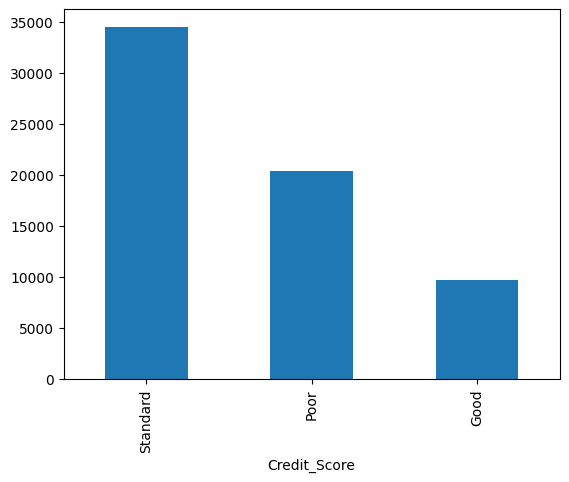

In [61]:
df['Credit_Score'].value_counts().plot(kind='bar')

In [62]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    34454
Poor        20412
Good         9743
Name: count, dtype: int64

<Axes: xlabel='Credit_Score', ylabel='Age'>

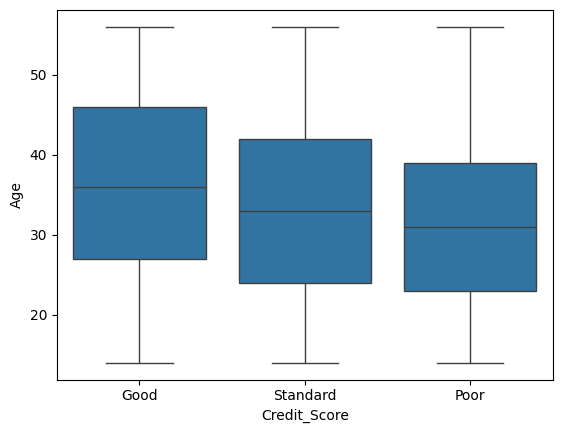

In [63]:
sns.boxplot(df,y='Age',x='Credit_Score')

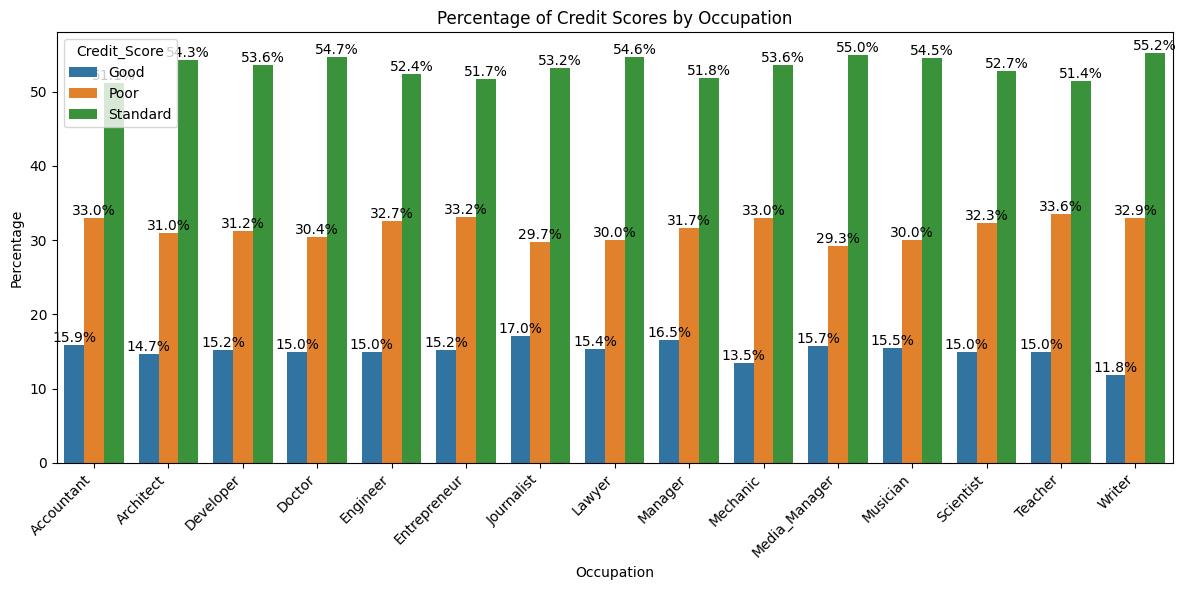

In [64]:
data = df.groupby(['Occupation', 'Credit_Score']).size().reset_index(name='Count')
total_counts = data.groupby('Occupation')['Count'].transform('sum')
data['Percentage'] = (data['Count'] / total_counts) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data, x='Occupation', y='Percentage', hue='Credit_Score')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Credit Scores by Occupation')
plt.ylabel('Percentage')
plt.tight_layout()

plt.show()

<Axes: xlabel='Credit_Score', ylabel='Annual_Income'>

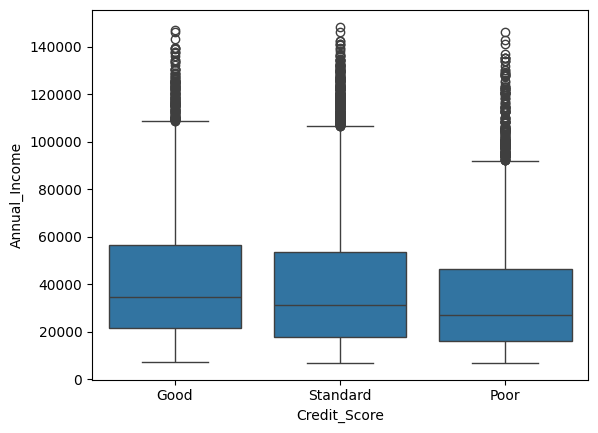

In [65]:
sns.boxplot(df,y='Annual_Income',x='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

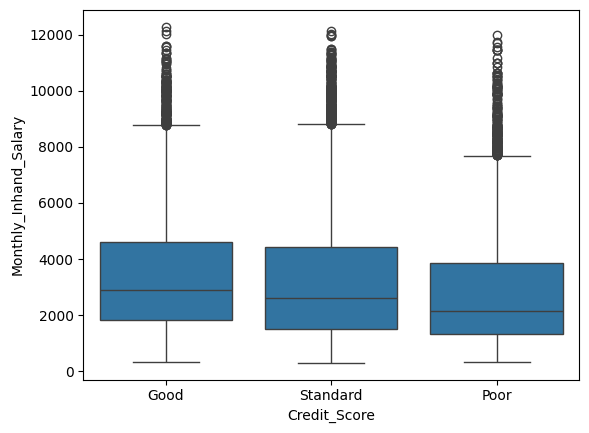

In [66]:
sns.boxplot(df,y='Monthly_Inhand_Salary',x='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

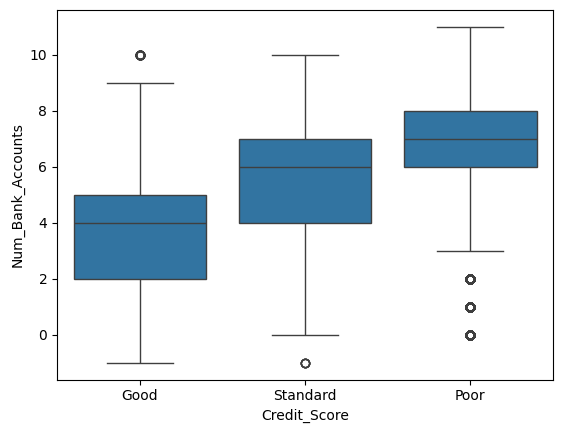

In [67]:
sns.boxplot(df,y='Num_Bank_Accounts',x='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Num_Credit_Card'>

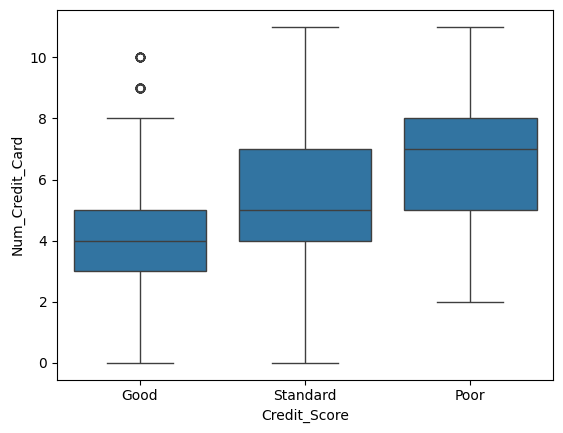

In [68]:
sns.boxplot(df,y='Num_Credit_Card',x='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Interest_Rate'>

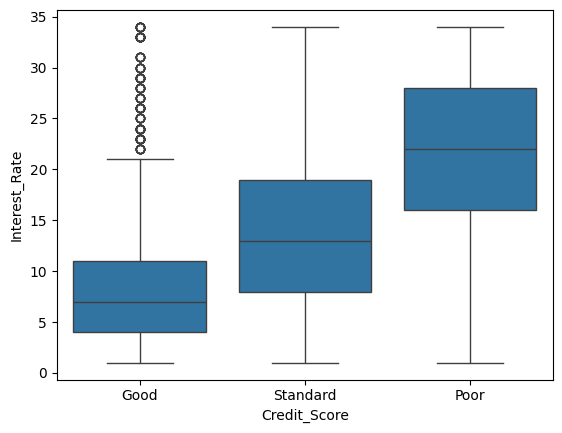

In [69]:
sns.boxplot(df,y='Interest_Rate',x='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Num_of_Loan'>

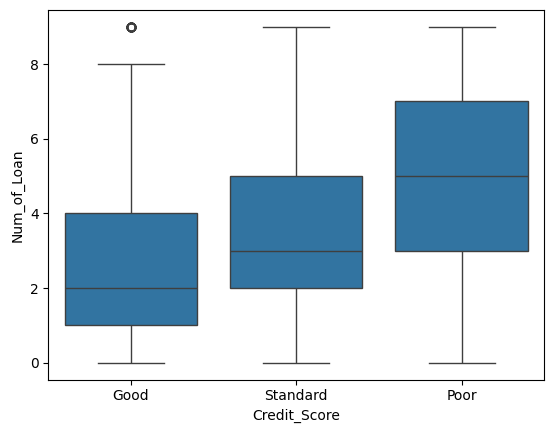

In [70]:
sns.boxplot(df,y='Num_of_Loan',x='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Delay_from_due_date'>

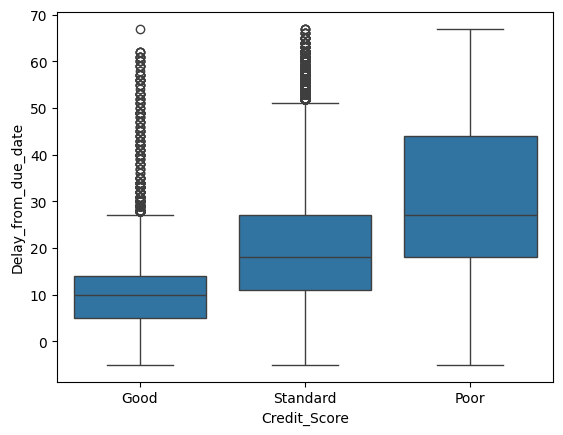

In [71]:
sns.boxplot(df,y='Delay_from_due_date',x='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Num_of_Delayed_Payment'>

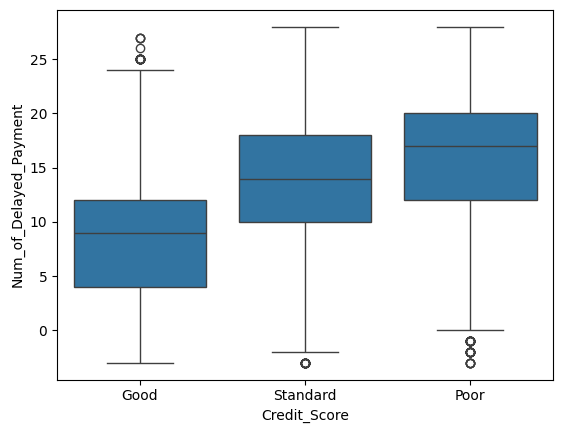

In [72]:
sns.boxplot(df,y='Num_of_Delayed_Payment',x='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Changed_Credit_Limit'>

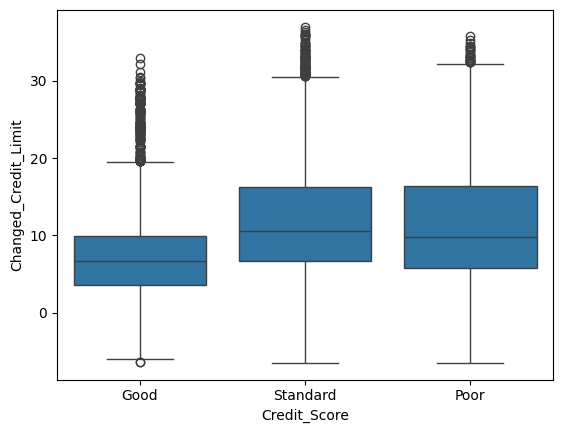

In [73]:
sns.boxplot(df,y='Changed_Credit_Limit',x='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Num_Credit_Inquiries'>

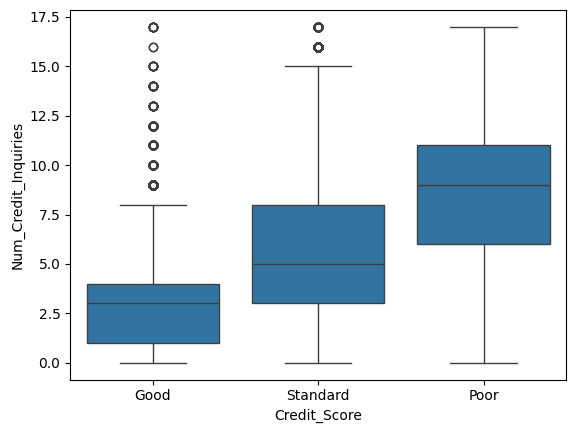

In [74]:
sns.boxplot(df,y='Num_Credit_Inquiries',x='Credit_Score')

<Axes: xlabel='Credit_Mix', ylabel='count'>

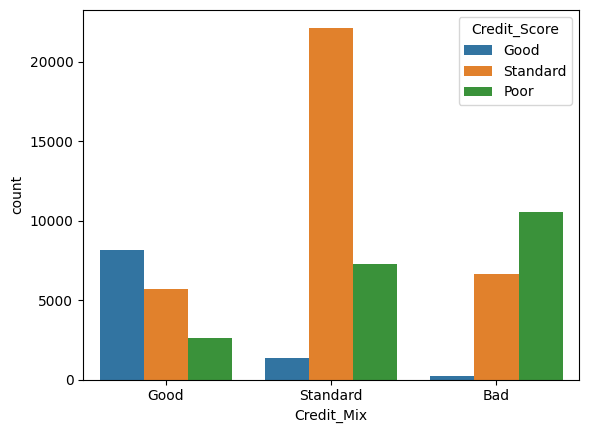

In [75]:
sns.countplot(df,x='Credit_Mix',hue='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Outstanding_Debt'>

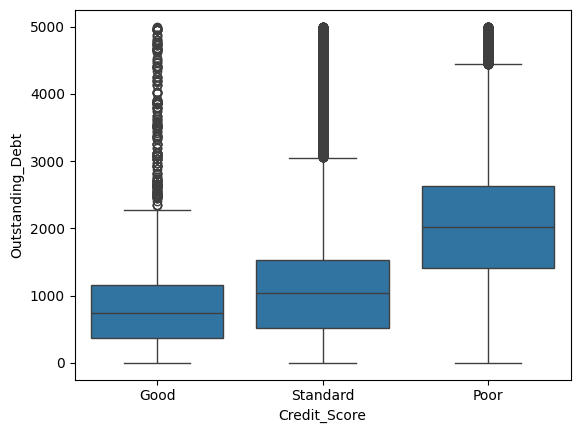

In [76]:
sns.boxplot(df,y='Outstanding_Debt',x='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

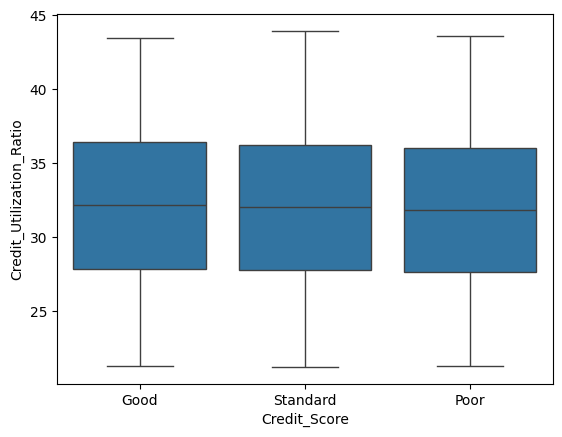

In [77]:
sns.boxplot(df,y='Credit_Utilization_Ratio',x='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Credit_History_Age'>

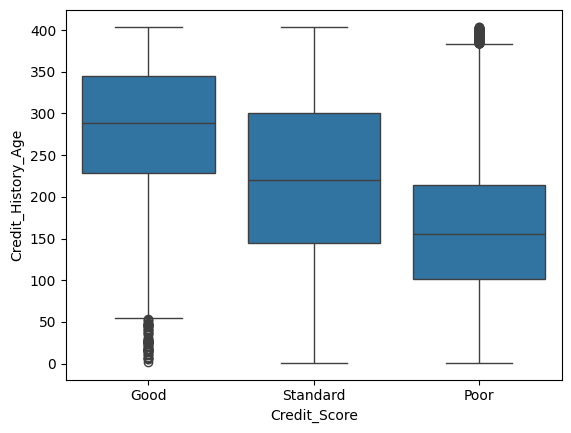

In [78]:
sns.boxplot(df,y='Credit_History_Age',x='Credit_Score')

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

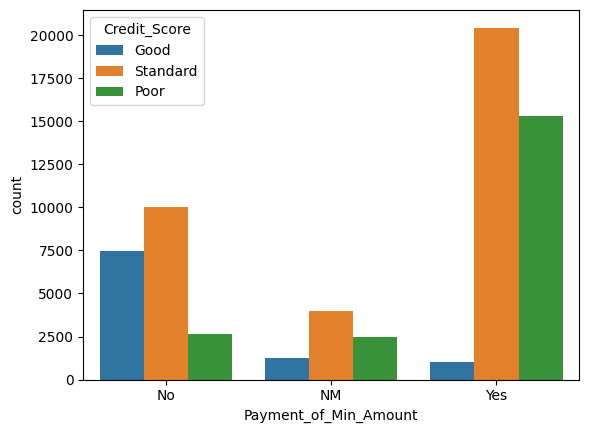

In [79]:
sns.countplot(df,x='Payment_of_Min_Amount',hue='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Total_EMI_per_month'>

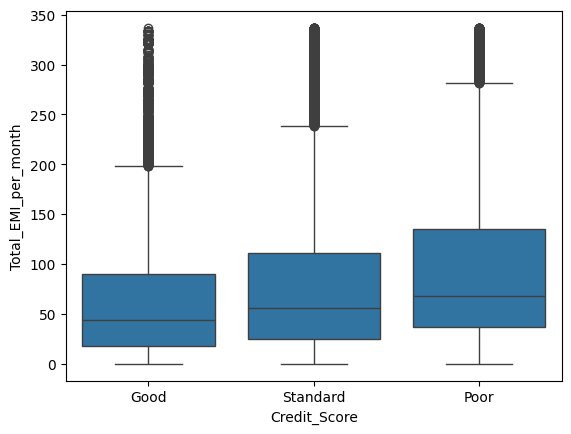

In [80]:
sns.boxplot(df,y='Total_EMI_per_month',x='Credit_Score')

<Axes: xlabel='Credit_Score', ylabel='Amount_invested_monthly'>

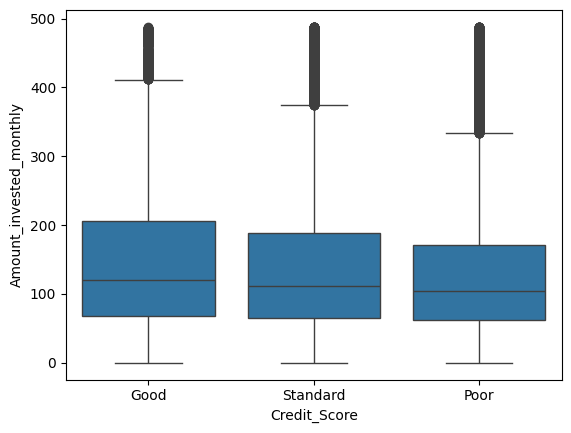

In [81]:
sns.boxplot(df,y='Amount_invested_monthly',x='Credit_Score')

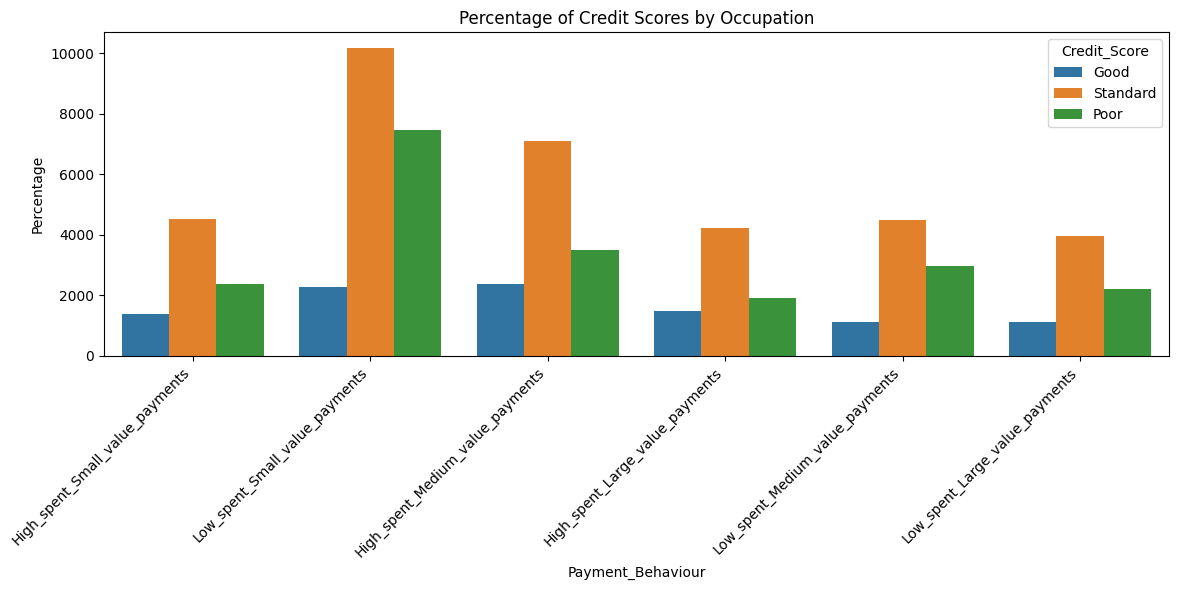

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(df,x='Payment_Behaviour',hue='Credit_Score')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Credit Scores by Occupation')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

<Axes: xlabel='Credit_Score', ylabel='Monthly_Balance'>

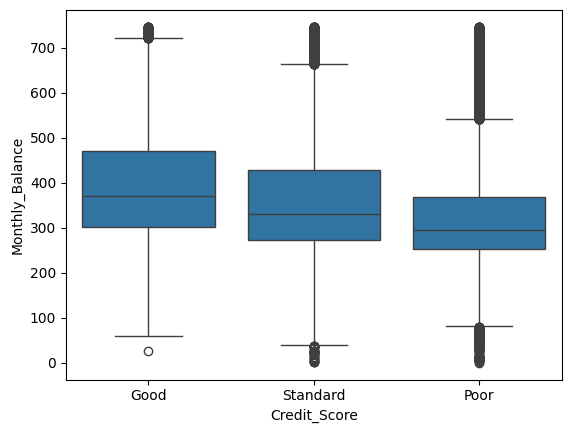

In [83]:
sns.boxplot(df,y='Monthly_Balance',x='Credit_Score')

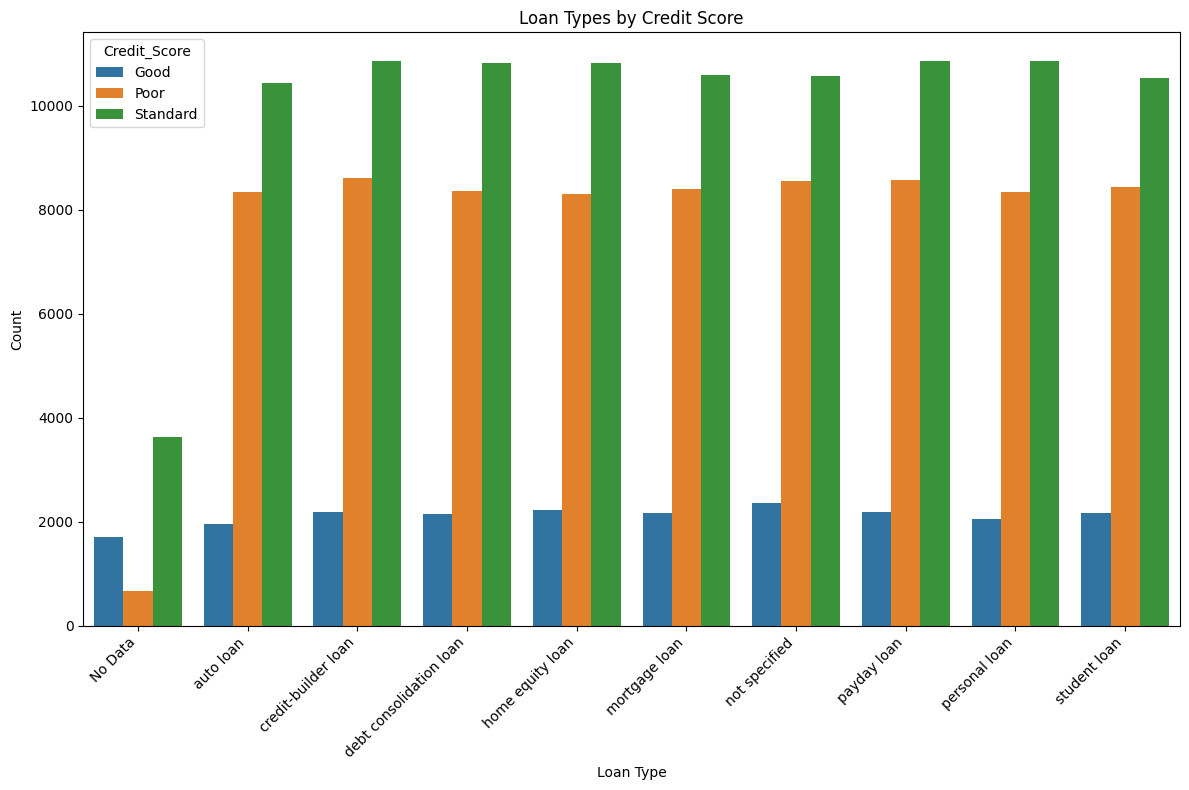

In [84]:
loan_columns = [
    'auto loan', 'credit-builder loan', 'debt consolidation loan',
    'home equity loan', 'mortgage loan', 'not specified',
    'payday loan', 'personal loan', 'student loan', 'No Data'
]

melted_df = df.melt(id_vars='Credit_Score', value_vars=loan_columns,
                    var_name='Loan Type', value_name='Status')

# Filter for "yes" only to show loans taken
melted_df = melted_df[melted_df['Status'] == 'yes']

# Group by Loan Type and Credit_Score and calculate the counts
grouped_data = melted_df.groupby(['Loan Type', 'Credit_Score']).size().reset_index(name='Count')

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='Loan Type', y='Count', hue='Credit_Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Loan Types by Credit Score')
plt.ylabel('Count')
plt.xlabel('Loan Type')

# Show the plot
plt.tight_layout()
plt.show()

# Analysis

Data is unbalanced. good < poor < standard.

**Age** gente mayor tiende a tener mejor credit score

**Occupation** La ocupacion parese no afectar en el credit_score

**Annual_Income** Mientras mas sea el anual income, tienden a tener mejor credit_score. NO parece afectar mucho

**Monthly_Inhand_Salary** Igual que anual income

**Num_Bank_accounts** Los usuarios con buen credit score, tienden a tener menos bank accounts que los que tienen un mal credit score

**Num_Credit_card** mejor credit score, tiene menos credit cards

**Interest_Rate** Los clientes com buen credit score, tienen un interest rate mas bajo

**Num_of_loan** mejor credit score, tiene menos loans

**Delay from due date** mejor credit score, tiende a no atrasarse

**Num_of_Delayed_Payment** good credit score tiene pocos pagos atrasados

**Changed_Credit_Limit** good credit socre tiene pocos cambios en el credit limit

**NUM Credit Inquery** less credit inqueries means better score

**Credit Mix** seems to have a direct translations to Credit Score

**Outstanding_Debt** more debts, means worse credit score

**Credit_Utilization_Ratio** No effect on credit score

**Credit_History_Age** Longer the age is, better the credit

**Payment_of_Min_Amount** People who does not do the payment of minaamount tends to have better score

**Total_EMI_per_month** Lower EMI per Month -> better credit Score

**Amount_invested_monthly** People with good score invests slightly more.

**Payment_Behaviour** People with bad credit score tends to low_spent_small_value_payments

**Monthly_Balance** people with better credit score has higher monthly balances

In [85]:
df.head()

Age Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 23.00  Scientist       19114.12                1824.84               3.00   
3 23.00  Scientist       19114.12                1824.84               3.00   
5 23.00  Scientist       19114.12                1824.84               3.00   
6 23.00  Scientist       19114.12                1824.84               3.00   
7 23.00  Scientist       19114.12                1824.84               3.00   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0             4.00           3.00         4.00                    3   
3             4.00           3.00         4.00                    5   
5             4.00           3.00         4.00                    8   
6             4.00           3.00         4.00                    3   
7             4.00           3.00         4.00                    3   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                    7.00                 11.27                  4.00   
3                    4.00                  6.27                  4.00   
5                    4.00                  9.27                  4.00   
6                    8.00                 11.27                  4.00   
7                    6.00                 11.27                  4.00   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0       Good            809.98                     26.82              265.00   
3       Good            809.98                     31.38              268.00   
5       Good            809.98                     27.26              270.00   
6       Good            809.98                     22.54              271.00   
7       Good            809.98                     23.93              265.00   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No                49.57                    80.42   
3                    No                49.57                   199.46   
5                    No                49.57                    62.43   
6                    No                49.57                   178.34   
7                    No                49.57                    24.79   

                  Payment_Behaviour  Monthly_Balance Credit_Score auto loan  \
0   High_spent_Small_value_payments           312.49         Good       yes   
3    Low_spent_Small_value_payments           223.45         Good       yes   
5  High_spent_Medium_value_payments           340.48         Good       yes   
6    Low_spent_Small_value_payments           244.57         Good       yes   
7  High_spent_Medium_value_payments           358.12     Standard       yes   

  credit-builder loan debt consolidation loan home equity loan mortgage loan  \
0                 yes                      no              yes            no   
3                 yes                      no              yes            no   
5                 yes                      no              yes            no   
6                 yes                      no              yes            no   
7                 yes                      no              yes            no   

  not specified payday loan personal loan student loan No Data  
0            no          no           yes           no      no  
3            no          no           yes           no      no  
5            no          no           yes           no      no  
6            no          no           yes           no      no  
7            no          no           yes           no      no

Model

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score



# Split data into features (X) and target (y)
X = df.drop(columns=['Credit_Score'])  # Replace 'credit_score' with your target column
y = df['Credit_Score']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [87]:
# Split data into features (X) and target (y)
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify categorical and numerical columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [88]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [89]:
# Logistic Regression
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Updated parameters to address convergence warning
params_lr = {
    'classifier__solver': ['lbfgs', 'liblinear'],  # Adding solvers for comparison
    'classifier__C': [1, 1.5],                    # Regularization strength
    'classifier__max_iter': [200, 500],           # Increased iterations
}

grid_lr = GridSearchCV(estimator=model_lr,
                       param_grid=params_lr,
                       cv=10,
                       n_jobs=-1,
                       verbose=1,
                       scoring='accuracy')

# Fit Logistic Regression Grid Search
#grid_lr.fit(X_train, y_train)
#best_lr_model = grid_lr.best_estimator_
#print("Logistic Regression Best Params:", grid_lr.best_params_)
#print("Logistic Regression Best Score:", grid_lr.best_score_)


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Logistic Regression Best Params: {'classifier__C': 1, 'classifier__max_iter': 200, 'classifier__solver': 'lbfgs'}
Logistic Regression Best Score: 0.6776559637203692


In [115]:
# Random Forest
model_rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42,criterion='gini',n_estimators=100))
])

# Parameters for Random Forest
params_rfc = {
    'classifier__n_estimators': [50, 100],        # Number of trees
    'classifier__criterion': ['gini', 'entropy'], # Splitting criterion
}

grid_rfc = GridSearchCV(estimator=model_rfc,
                        param_grid=params_rfc,
                        cv=10,
                        n_jobs=-1,
                        verbose=1,
                        scoring='accuracy')

# Fit Random Forest Grid Search
#grid_rfc.fit(X_train, y_train)
#best_rfc_model = grid_rfc.best_estimator_
#print("Random Forest Best Params:", grid_rfc.best_params_)
#print("Random Forest Best Score:", grid_rfc.best_score_)
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)


In [91]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# XGBoost
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='mlogloss', use_label_encoder=False))
])

# Parameters for XGBoost
params_xgb = {
    'classifier__n_estimators': [50, 100],        # Number of boosting rounds
    'classifier__learning_rate': [0.01, 0.1],    # Learning rate
    'classifier__max_depth': [3, 5],             # Maximum depth of a tree
}

grid_xgb = GridSearchCV(estimator=model_xgb,
                        param_grid=params_xgb,
                        cv=10,
                        n_jobs=-1,
                        verbose=1,
                        scoring='accuracy')

# Fit XGBoost Grid Search
#grid_xgb.fit(X_train, y_train_encoded)  # Use encoded target variable
#best_xgb_model = grid_xgb.best_estimator_
#print("XGBoost Best Params:", grid_xgb.best_params_)
#print("XGBoost Best Score:", grid_xgb.best_score_)


Fitting 10 folds for each of 8 candidates, totalling 80 fits


/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/lea

XGBoost Best Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
XGBoost Best Score: 0.7398765869942687


In [ ]:
# Evaluate Logistic Regression
#y_pred_lr = best_lr_model.predict(X_test)
#print("\nLogistic Regression Results:")
#print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))
#print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Evaluate Random Forest
#y_pred_rfc = best_rfc_model.predict(X_test)
#print("\nRandom Forest Results:")
#print("Accuracy Score:", accuracy_score(y_test, y_pred_rfc))
#print("Classification Report:\n", classification_report(y_test, y_pred_rfc))

# Evaluate XGBoost
#y_pred_xgb = best_xgb_model.predict(X_test)
#y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)  # Decode predictions

#print("\nXGBoost Results:")
#print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb_decoded))
#print("Classification Report:\n", classification_report(y_test, y_pred_xgb_decoded))



Logistic Regression Results:
Accuracy Score: 0.6755146262188516
Classification Report:
               precision    recall  f1-score   support

        Good       0.56      0.68      0.61      1949
        Poor       0.67      0.58      0.63      4082
    Standard       0.71      0.73      0.72      6891

    accuracy                           0.68     12922
   macro avg       0.65      0.66      0.65     12922
weighted avg       0.68      0.68      0.68     12922


Random Forest Results:
Accuracy Score: 0.8045968116390652
Classification Report:
               precision    recall  f1-score   support

        Good       0.76      0.75      0.76      1949
        Poor       0.79      0.83      0.81      4082
    Standard       0.83      0.81      0.82      6891

    accuracy                           0.80     12922
   macro avg       0.79      0.79      0.79     12922
weighted avg       0.81      0.80      0.80     12922


XGBoost Results:
Accuracy Score: 0.7351803126451014
Classificatio

In [99]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [112]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

        Good       0.76      0.75      0.76      1949
        Poor       0.79      0.83      0.81      4082
    Standard       0.83      0.81      0.82      6891

    accuracy                           0.80     12922
   macro avg       0.79      0.79      0.79     12922
weighted avg       0.81      0.80      0.80     12922



In [108]:
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'auto loan', 'credit-builder loan',
       'debt consolidation loan', 'home equity loan', 'mortgage loan',
       'not specified', 'payday loan', 'personal loan', 'student loan',
       'No Data'],
      dtype='object')

In [109]:
undersampled_data = pd.DataFrame(columns=['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'auto loan', 'credit-builder loan',
       'debt consolidation loan', 'home equity loan', 'mortgage loan',
       'not specified', 'payday loan', 'personal loan', 'student loan',
       'No Data'] )
undersampled_data = pd.concat([undersampled_data, df[df['Credit_Score']=='Good'].sample(9000)])
undersampled_data = pd.concat([undersampled_data, df[df['Credit_Score']=='Standard'].sample(9000)])
undersampled_data = pd.concat([undersampled_data, df[df['Credit_Score']=='Poor'].sample(9000)]) 
df = undersampled_data
df.reset_index(inplace=True)

/var/folders/h3/k12jkzgd33q8wkd3qpryvhsh0000gn/T/ipykernel_45506/1727389783.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  undersampled_data = pd.concat([undersampled_data, df[df['Credit_Score']=='Good'].sample(9000)])


In [113]:
df['Credit_Score'].value_counts()

Credit_Score
Good        9000
Standard    9000
Poor        9000
Name: count, dtype: int64

<Axes: >

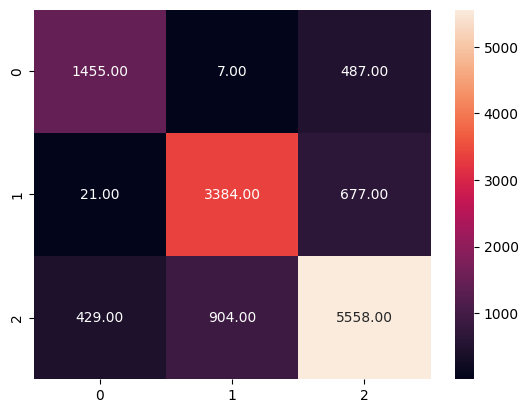

In [114]:
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot = True, fmt = '.2f')

In [93]:
# Preprocess the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [94]:
# Get feature names after preprocessing
def get_feature_names(column_transformer):
    feature_names = []
    for name, transformer, column in column_transformer.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            feature_names.extend(transformer.get_feature_names_out(column))
        else:
            feature_names.extend(column)  # Pass-through columns
    return feature_names

# Extract feature names from the preprocessor
transformed_feature_names = get_feature_names(preprocessor)


from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME Explainer
explainer = LimeTabularExplainer(
    training_data=X_train_transformed,
    feature_names=transformed_feature_names,  # Use transformed feature names
    class_names=label_encoder.classes_,       # Original class names
    mode='classification'
)


# Select an instance from the transformed test set
i = 0  # Replace with the desired index
instance = X_test_transformed[i]

# Explain Logistic Regression
print("Explaining Logistic Regression:")
exp_lr = explainer.explain_instance(
    data_row=instance,
    predict_fn=best_lr_model.named_steps['classifier'].predict_proba
)
exp_lr.show_in_notebook()

# Explain Random Forest
print("Explaining Random Forest:")
exp_rfc = explainer.explain_instance(
    data_row=instance,
    predict_fn=best_rfc_model.named_steps['classifier'].predict_proba
)
exp_rfc.show_in_notebook()

# Explain XGBoost
print("Explaining XGBoost:")
exp_xgb = explainer.explain_instance(
    data_row=instance,
    predict_fn=best_xgb_model.named_steps['classifier'].predict_proba
)
exp_xgb.show_in_notebook()



Explaining Logistic Regression:


Explaining Random Forest:


Explaining XGBoost:


In [95]:
# Example new data (replace with your actual data)
new_data = pd.DataFrame({
    'Age': [25, 45],
    'Income': [50000, 120000],
    'Employment_Status': ['Employed', 'Self-Employed'],
    'Loan_Amount': [10000, 50000],
    'Credit_History_Age': [10, 20],
    'Num_Bank_Accounts': [2, 5],
    'Monthly_Balance': [2000, 5000],
    'Num_of_Delayed_Payment': [0, 1],
    'Num_of_Loan': [1, 3],
    'Num_Credit_Inquiries': [1, 2],
    'Credit_Utilization_Ratio': [0.3, 0.6],
    'Annual_Income': [60000, 140000],
    'Payment_Behaviour': ['Good', 'Bad'],
    'Occupation': ['Accountant', 'Engineer'],
    'Num_Credit_Card': [1, 2],
    'Changed_Credit_Limit': [0, 1],
    'Outstanding_Debt': [5000, 10000],
    'Interest_Rate': [5, 7],
    'Amount_invested_monthly': [1000, 1500],
    'Delay_from_due_date': [0, 5],
    'payday loan': [0, 0],
    'mortgage loan': [0, 1],
    'home equity loan': [0, 0],
    'debt consolidation loan': [0, 0],
    'student loan': [0, 0],
    'personal loan': [1, 0],
    'auto loan': [0, 1],
    'not specified': [0, 0],
    'credit-builder loan': [0, 0],
    'No Data': [0, 0],
    'Payment_of_Min_Amount': ['Yes', 'No'],
    'Credit_Mix': ['Good', 'Standard'],
    'Total_EMI_per_month': [2000, 2500],
    'Monthly_Inhand_Salary': [4000, 8000]
})

# Step 1: Align categorical values
categorical_transformer = preprocessor.named_transformers_['cat']
expected_categories = categorical_transformer.categories_

for idx, column in enumerate(categorical_features):
    if column in new_data.columns:
        new_data[column] = new_data[column].apply(
            lambda x: x if x in set(expected_categories[idx]) else 'unknown'
        )

# Step 2: Ensure all columns are present
missing_cols = set(X.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0  # Add missing numeric or one-hot encoded columns with default values

# Reorder columns to match the training data structure
new_data = new_data[X.columns]

# Step 3: Transform new_data
new_data_transformed = preprocessor.transform(new_data)

# Ensure the transformed data matches the feature count
print("Transformed new_data shape:", new_data_transformed.shape)
print("Expected feature count:", preprocessor.transform(X_train).shape[1])

# Step 4: Make predictions using the entire pipeline
new_pred_lr = best_lr_model.predict(new_data)
new_pred_rfc = best_rfc_model.predict(new_data)
new_pred_xgb = best_xgb_model.predict(new_data)



# Step 5: Display predictions
print("Logistic Regression Predictions:", new_pred_lr)
print("Random Forest Predictions:", new_pred_rfc)
print("XGBoost Predictions:", new_pred_xgb)



Transformed new_data shape: (2, 64)
Expected feature count: 64
Logistic Regression Predictions: ['Good' 'Good']
Random Forest Predictions: ['Good' 'Standard']
XGBoost Predictions: [0 2]


In [96]:
#XG Boost
#0: 'Good'
#1: 'Poor'
#2: 'Standard'